# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [220]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [221]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [222]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)


Read the GSS data again.

In [223]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 10.3 ms, sys: 15.9 ms, total: 26.2 ms
Wall time: 24.9 ms


(62466, 101)

In [224]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,NaN,0,2.0,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30.0,2,0.0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,NaN,0,7.0,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18.0,1,6.0,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22.0,2,3.0,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [225]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

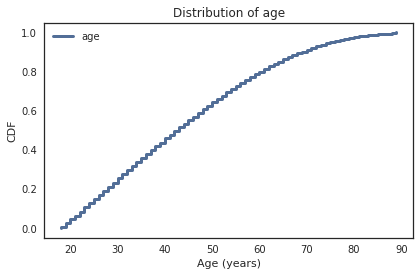

In [226]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: the line does not align very well with the normal distribution model. This could suggest that the distribution of ages is not a normal distribution. The age of the population is not even throughout.

n, mean, std 62281 44.47905368874617 16.482037485676


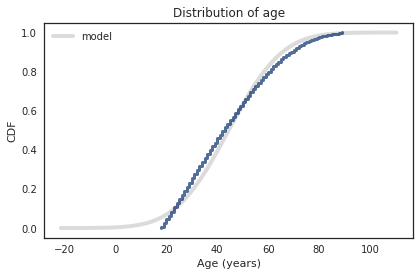

In [227]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation: *** For some reason the data won't plot on the makeNormalPlots. I talked to Kaitlyn and it was puzzling to her as well. The data would look like a linear line if the distribution is normal.***

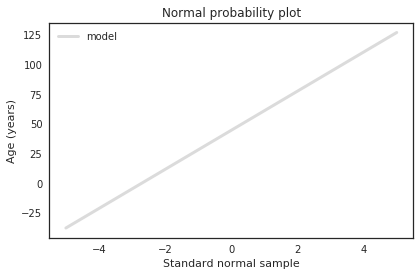

In [228]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: Since this is the complementary CDF on a log-y scale, one sould expect a straight line if the data has an exponential distribution. Since the line is curved, it can be concluded that this model is probably not a good fit for the data. 

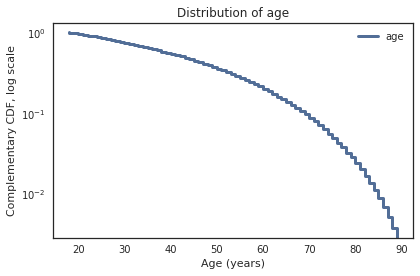

In [229]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

Interpretation: If a CDF is graphed on a log-x scale, it is expected that the shape resembles a normal distribution. This looks like it could be a very weak resemblance of a normal distribustion because it looks like there is a slight flux but it is very small if it is there at all. They way to check to see how close it is would be to plot a normal probability plot using the logs of the values. 

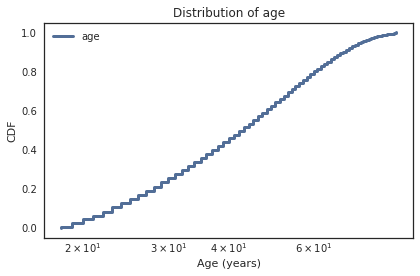

In [230]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation: If it was log normal, it would align with the normal model. This data doesn't seem to be very close to the normal model.

n, mean, std 62281 1.6168744157503179 0.16787914328916784


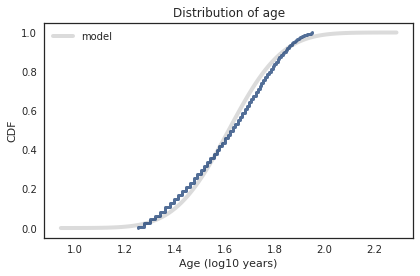

In [231]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: *** For some reason the data won't plot on the makeNormalPlots. I talked to Kaitlyn and it was puzzling to her as well. The data would look like a linear line if the distribution is lognormal.***

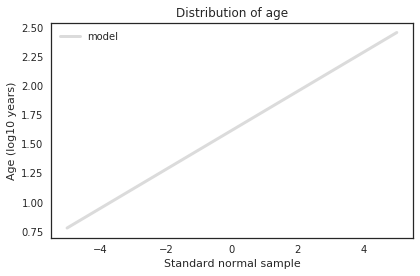

In [232]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: Seems as though this data is not best described with the pareto distribution. You would expect to see a linear line with a slope of negative alpha on the log-log scale if a pareto distribution was a good model. 

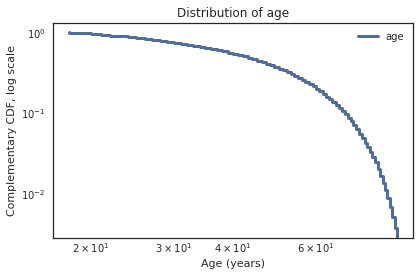

In [233]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: This does doest look like a Weibull model is a good choise for this data. I think you would expect to see a straight line  with a negative slope. 

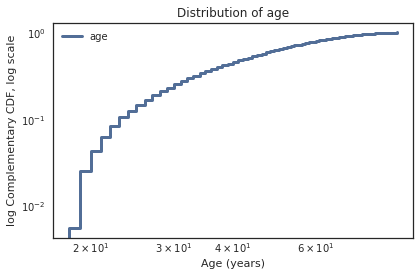

In [234]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

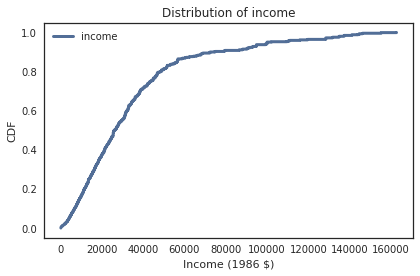

In [235]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

n, mean, std 55499 33882.52181307481 28502.895120969348


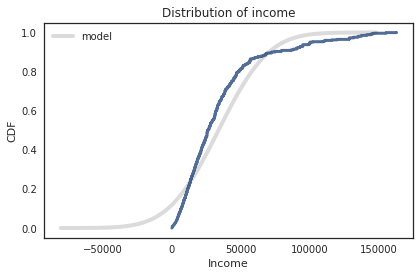

In [236]:
MakeNormalModel(gss.realinc.dropna(), label='')

decorate(title='Distribution of income', 
         xlabel='Income', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

***Not able to plot normal plot***

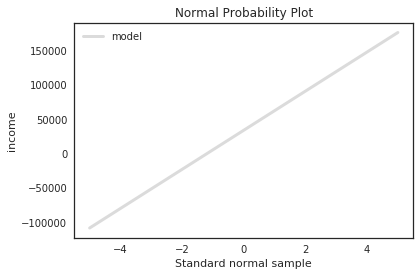

In [237]:

MakeNormalPlot(gss.realinc.dropna(), label='')

decorate(title='Normal Probability Plot',
         xlabel='Standard normal sample',
         ylabel='income')

3) Here's the complementary CDF on a log-y scale.

The first part, up to 40000 looks slightly linear, but the rest of it doens't not look like a straight line which is what you would expect ideally. 

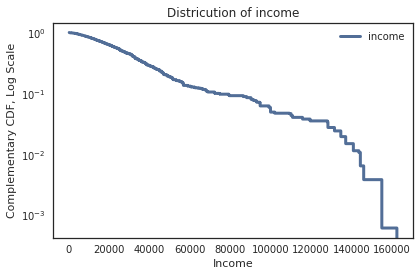

In [238]:

thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Districution of income',
        xlabel="Income",
        ylabel='Complementary CDF, Log Scale',
        yscale='log')

4) Here's the CDF on a log-x scale.

This graph has a shape that is somewhat similar to the normal distribution. It's rate fo change is positive at the beginning and then becomes negative.

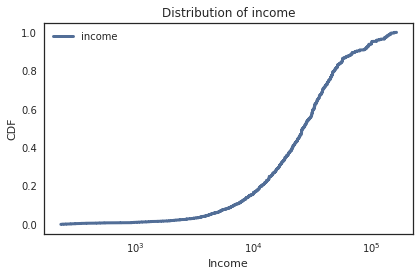

In [239]:
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income',
        xlabel='Income',
        ylabel='CDF',
        xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

This actually looks like a pretty good model. With the log of the values, the shape looks much like the shape of a normal distribution. This means that it could be a lognormal distribution.

n, mean, std 55499 4.381031736514132 0.3856600273208646


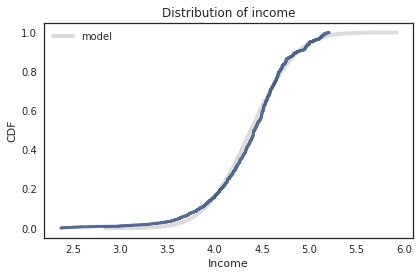

In [240]:
values = np.log10(gss.realinc.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of income',
        xlabel='Income',
        ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

***MakeNormalPlot does not plot for some reason***
If the lognormal distirbution was a good model for this data set, then the line on this normal probability plot would look very close to the model. The more alike it is, the better it first this date. 

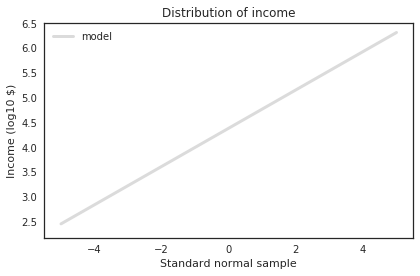

In [241]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of income',
        xlabel='Standard normal sample',
        ylabel='Income (log10 $)')

7) Here's the complementary CDF on a log-log scale.

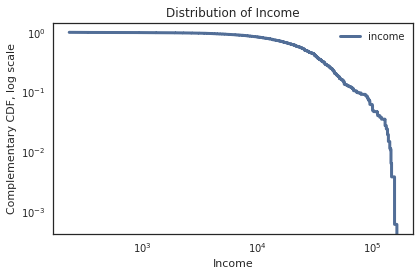

In [242]:
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of Income',
        xlabel='Income',
        ylabel='Complementary CDF, log scale',
        xscale='log',
        yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

Interpretation:

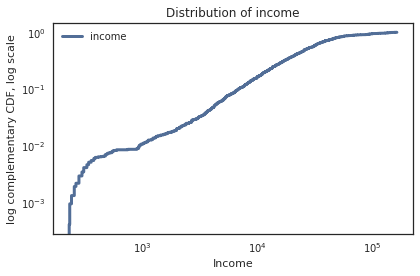

In [243]:
thinkplot.cdf(cdf_realinc, label='income', transform='Weibull')

decorate(title='Distribution of income',
        xlabel='Income',
        ylabel='log complementary CDF, log scale',
         xscale='log',
        yscale='log')

## BRFSS


In [244]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

CPU times: user 7.92 ms, sys: 81 µs, total: 8 ms
Wall time: 6.74 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

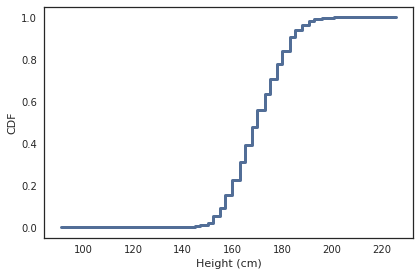

In [245]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [246]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

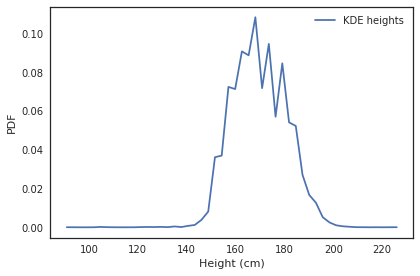

In [247]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

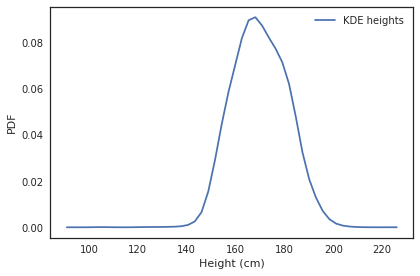

In [248]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [249]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191394)

Here's the model compared to the estimated PDF.

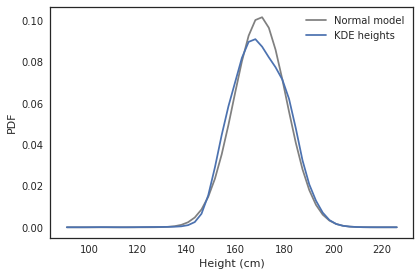

In [250]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

In [251]:
women = brfss[brfss.SEX == 2.0]
women_heights = women.HTM4
women_heights.head()

96230     160.0
244920    163.0
57312     163.0
32573     165.0
355929    170.0
Name: HTM4, dtype: float64

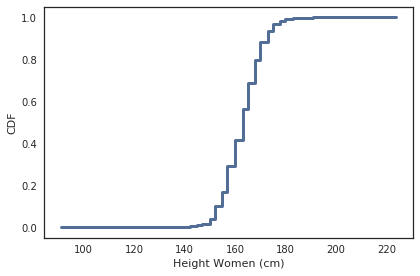

In [252]:
cdf_women = Cdf(women_heights)
thinkplot.Cdf(cdf_women)

decorate(xlabel='Height Women (cm)', ylabel='CDF')

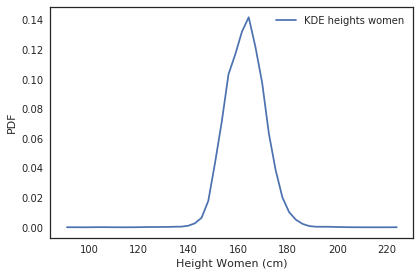

In [253]:
kde_women = gaussian_kde(women_heights.dropna(), bw_method=0.3)

xs = np.linspace(women_heights.min(), women_heights.max())
ds = kde_women.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights women')

decorate(xlabel='Height Women (cm)', ylabel='PDF')

In [254]:
mean_women = women_heights.mean()
std_women = women_heights.std()

mean_women, std_women

(162.96853146853147, 7.582218127934922)

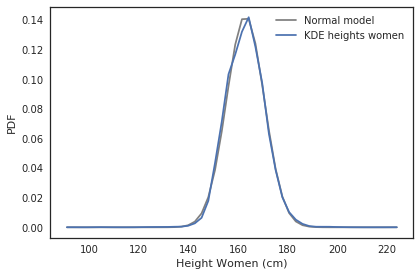

In [255]:
normal_pdf_women = thinkstats2.NormalPdf(mean_women, std_women)

ps = normal_pdf_women.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights women')

decorate(xlabel='Height Women (cm)', ylabel='PDF')

The two graphs look very similar. 

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

In [256]:
weight = brfss[brfss.SEX == 1.0]
men_weight = weight.WTKG3
men_weight.head()

302232       NaN
26440      68.04
125041    125.65
31904      88.45
273000       NaN
Name: WTKG3, dtype: float64

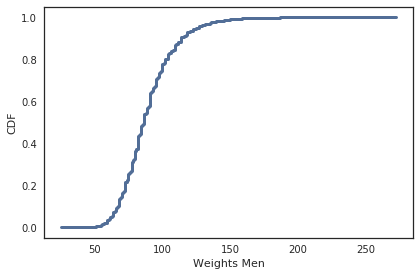

In [257]:
cdf_weights_men = Cdf(men_weight)
thinkplot.Cdf(cdf_weights_men)

decorate(xlabel='Weights Men', ylabel="CDF")

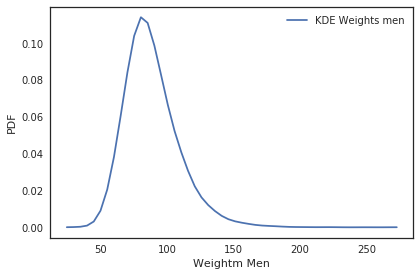

In [258]:
kde_weight_men = gaussian_kde(men_weight.dropna(), bw_method=0.3)

xs = np.linspace(men_weight.min(), men_weight.max())
ds = kde_weight_men.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label="KDE Weights men")
decorate(xlabel='Weightm Men', ylabel="PDF")

In [259]:
mean_weight_men = men_weight.mean()
std_weight_men = men_weight.std()

mean_weight_men, std_weight_men

(88.83871202341662, 20.135078906400217)

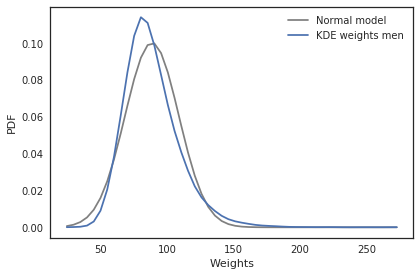

In [260]:
normal_pdf_height_men = thinkstats2.NormalPdf(mean_weight_men, std_weight_men)

ps = normal_pdf_height_men.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights men')

decorate(xlabel='Weights', ylabel='PDF')

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

In [261]:
log_men = np.log10(men_weight.dropna())

{'xscale': 'linear', 'yscale': 'linear'}

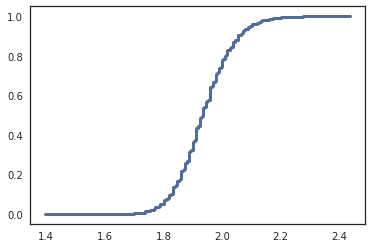

In [262]:
cdf_log = Cdf(log_men)
thinkplot.Cdf(cdf_log)

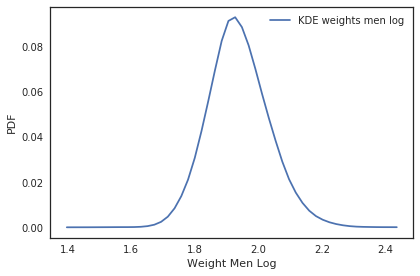

In [263]:
kde_log = gaussian_kde(log_men, bw_method=0.3)

xs = np.linspace(log_men.min(), log_men.max())
ds = kde_log.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label="KDE weights men log")

decorate(xlabel="Weight Men Log", ylabel="PDF")

In [264]:
mean_log_men = log_men.mean()
std_log_men = log_men.std()

mean_log_men, std_log_men

(1.9383408289484085, 0.0932512898752745)

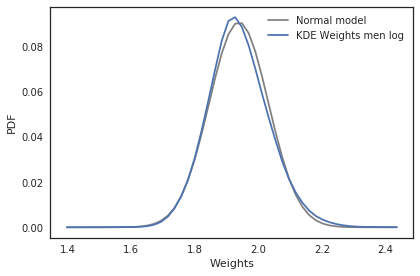

In [265]:
normal_pdf_log_men = thinkstats2.NormalPdf(mean_log_men, std_log_men)

ps = normal_pdf_log_men.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE Weights men log')

decorate(xlabel='Weights', ylabel='PDF')

They are very similar, this would imply that the data could be represented by a lognormal distribution. 

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [268]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [269]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [270]:
male_weights.mean(), male_weights.median()

(88.83871202341662, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [271]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [272]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [273]:
female_weights.mean(), female_weights.median()

(73.6243871435631, 70.31)

In [274]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [275]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

The women are more skewed. 

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

In [276]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', 'AGE'], dtype='object')

In [289]:
first_marriage = gss.marcohrt

In [292]:
male = (gss.sex == 1)
men_year = gss.loc[male, 'marcohrt']

In [328]:
female = (gss.sex == 2)
women_year = gss.loc[female, 'marcohrt']

In [329]:
women_year.replace([9999,0], np.nan, inplace=True)

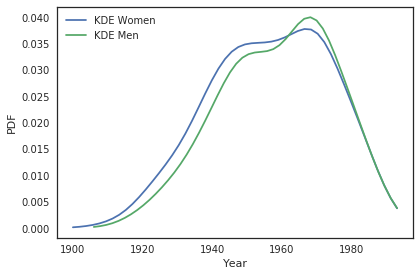

In [330]:
women_kde = gaussian_kde(women_year.dropna(), bw_method=0.3)

wxs = np.linspace(women_year.min(), women_year.max())
wds = women_kde.evaluate(wxs)
wds /= wds.sum()

men_kde = gaussian_kde(men_year.dropna(), bw_method=0.3)

mxs = np.linspace(men_year.min(), men_year.max())
mds = men_kde.evaluate(mxs)
mds /= mds.sum()

plt.plot(wxs, wds, label="KDE Women")
plt.plot(mxs, mds, label="KDE Men")
decorate(xlabel='Year', ylabel="PDF")

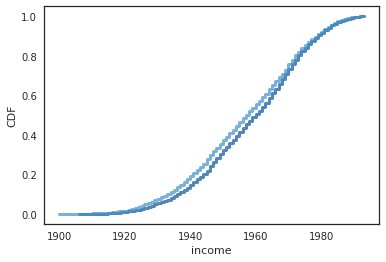

<Figure size 576x432 with 0 Axes>

In [333]:
cdf_men = Cdf(men_year)
cdf_women = Cdf(women_year)

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_men, cdf_women])
thinkplot.Show(xlabel='income', ylabel='CDF')

*** I think that there are Na in the data which I don't think I was able to remove. ***

In [334]:
mean_men = men_year.mean()
std_men = men_year.std()

mean_men, std_men

(1958.7194198668249, 16.295424590100147)

In [335]:
mean_women = women_year.mean()
std_women = women_year.std()

mean_women, std_women

(1956.617796970126, 17.173405011983153)

I suppose this was a bad choice in data because you can't compare the median and the mean as easily as the other examples.

In [339]:
thinkstats2.PearsonMedianSkewness(women_year.dropna())

-0.06676891833833286

In [340]:
thinkstats2.PearsonMedianSkewness(men_year.dropna())

-0.2357665247806197